In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

confusion matrix: 
 [[41  2]
 [ 2 69]]


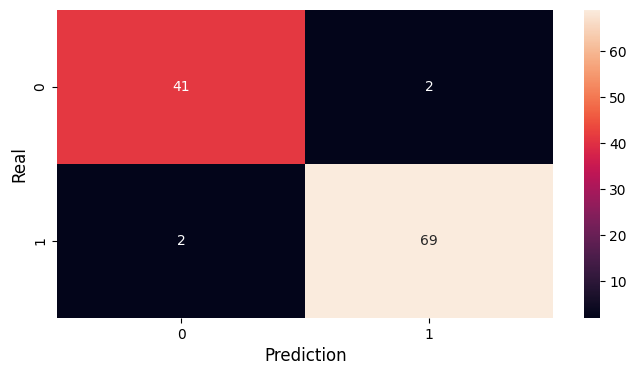

accuracy:  0.9649122807017544
recall:  0.971830985915493
precision:  0.971830985915493
specificity:  0.9534883720930233
f1 score:  0.971830985915493
auc:  0.9626596790042582


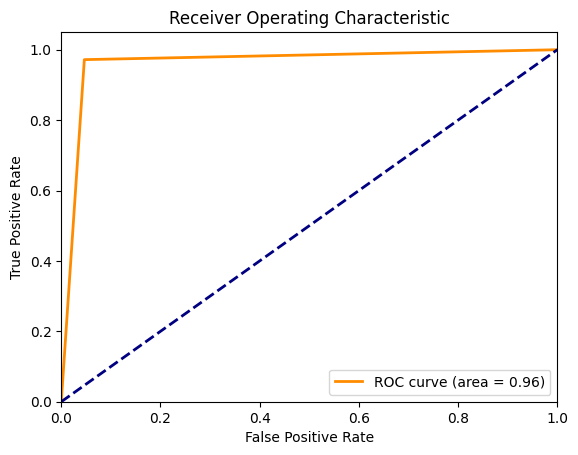

R2:  0.8506387160170324


In [2]:
# Carga el conjunto de datos Breast Cancer
dataset = load_breast_cancer()
X = dataset.data # 569x30
y = dataset.target # 569x1

# Divide el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliza los datos para que todas las características tengan una escala similar
scaler = MinMaxScaler(feature_range=(0,1)) # [0, 1]
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Crea y entrena el modelo K-NN
model = KNeighborsClassifier(n_neighbors=5, p=2,  # Función euclidean
                             weights='uniform')

model.fit(X_train, y_train)

# Realiza predicciones usando el conjunto de prueba
y_pred = model.predict(X_test)

# Convierte las probabilidades en etiquetas binarias (0 o 1)
# y_pred = (y_pred > 0.5)

# Muestra el informe de evaluación del modelo entrenado
print(classification_report(y_test, y_pred))

# Matriz de confusión:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print("confusion matrix: \n", cm)
# gráfica cm
plt.figure(figsize = (8,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Real', fontsize = 12)
plt.show()

# Exactitud:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)

# Sensibilidad:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("recall: ", recall)

# Precisión:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("precision: ", precision)

# Especificidad
# 'specificity' is just a special case of 'recall'. 
# specificity is the recall of the negative class
specificity = recall_score(y_test, y_pred, pos_label=0)
print("specificity: ", specificity)

# Puntuación F1:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("f1 score: ", f1)

# Área bajo la curva:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print("auc: ", auc)

# Curva ROC
from sklearn.metrics import roc_curve
plt.figure()
lw = 2
plt.plot(roc_curve(y_test, y_pred)[0], roc_curve(y_test, y_pred)[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' %auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# R Score (R^2 coefficient of determination)
from sklearn.metrics import r2_score
R = r2_score(y_test, y_pred)
print("R2: ", R)


In [3]:
# Guardar el modelo a un archivo
import joblib
joblib.dump(model, 'knn_model.pkl')
# Cargar el modelo desde el archivo
loaded_model = joblib.load('knn_model.pkl')
# Hacer predicciones con el modelo cargado
y_pred = model.predict(X_test)

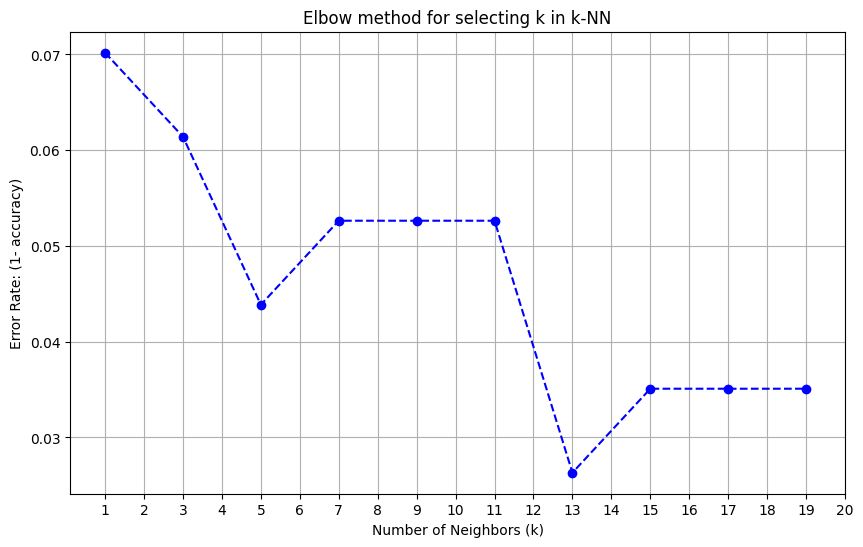

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Cargar el dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el rango de valores de k a evaluar
n = 21
k_range = range(1, n, 2) # en saltos de 2 (solo impares)
error_rates = []

# Evaluar el modelo para cada valor de k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, p=2, weights='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error)


# Graficar la tasa de error para cada valor de k
plt.figure(figsize=(10, 6))
plt.plot(k_range, error_rates, marker='o', linestyle='--', color='b')
plt.title('Elbow method for selecting k in k-NN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate: (1- accuracy)')
plt.xticks(np.arange(1, n, 1))
plt.grid()
plt.show()
